# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Open a Chrome window using Splinter
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object

# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find("table", {"class":"table"})

dfs = pd.read_html(str(table))
df = dfs[0]

df.head()

/var/folders/n_/5dzp30f565n5m8m7hsbbdh800000gn/T/ipykernel_25420/965726729.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
table_rows = table.find_all("tr", {"class": "data-row"})
for table_row in table_rows[0:10]:
    id = table_row.find_all("td")[0].text
    terrestrial_date = table_row.find_all("td")[1].text
    print(terrestrial_date)

2012-08-16
2012-08-17
2012-08-18
2012-08-19
2012-08-20
2012-08-21
2012-08-22
2012-08-23
2012-08-27
2012-08-28


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [7]:
# Examine data type of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [8]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])

In [9]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [10]:
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?

unique_months = df['month'].nunique()

# Print the result
print(f"There are {unique_months} months on Mars.")


There are 12 months on Mars.


In [15]:
# 2. How many sols (Martian days) worth of data are there?

unique_sols = df['sol'].nunique()

# Print the result
print(f"There are {unique_sols} sols (Martian days) worth of data in the dataset.")


There are 1867 sols (Martian days) worth of data in the dataset.


In [16]:
# 3. What is the average minimum temperature by month?

avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the results
print("Average Minimum Temperature by Month on Mars:")
print(avg_min_temp_by_month)


Average Minimum Temperature by Month on Mars:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


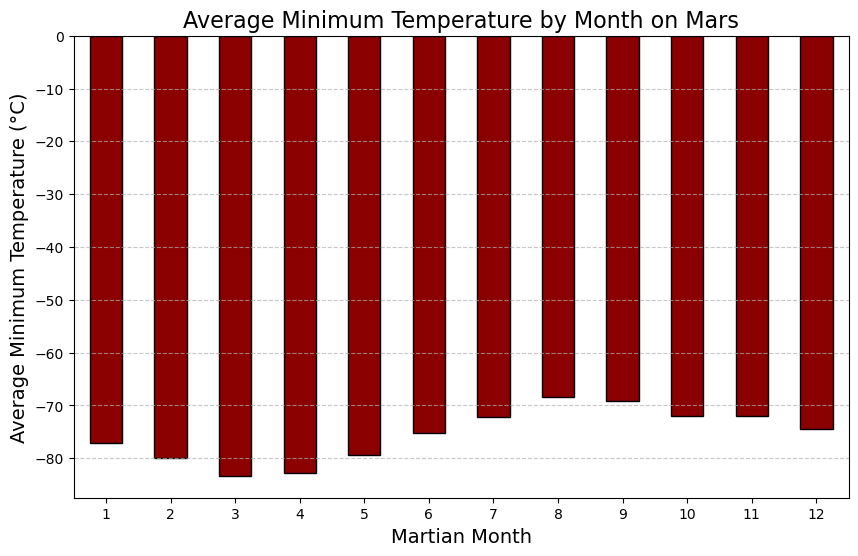

The coldest month on Mars is Month 3.
The warmest month on Mars is Month 8.


In [25]:
# Plot the average minimum temperature by month
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='darkred', edgecolor='black')
plt.title("Average Minimum Temperature by Month on Mars", fontsize=16)
plt.xlabel("Martian Month", fontsize=14)
plt.ylabel("Average Minimum Temperature (°C)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Find the coldest and warmest months
coldest_month = avg_min_temp_by_month.idxmin()
warmest_month = avg_min_temp_by_month.idxmax()
print(f"The coldest month on Mars is Month {coldest_month}.")
print(f"The warmest month on Mars is Month {warmest_month}.")

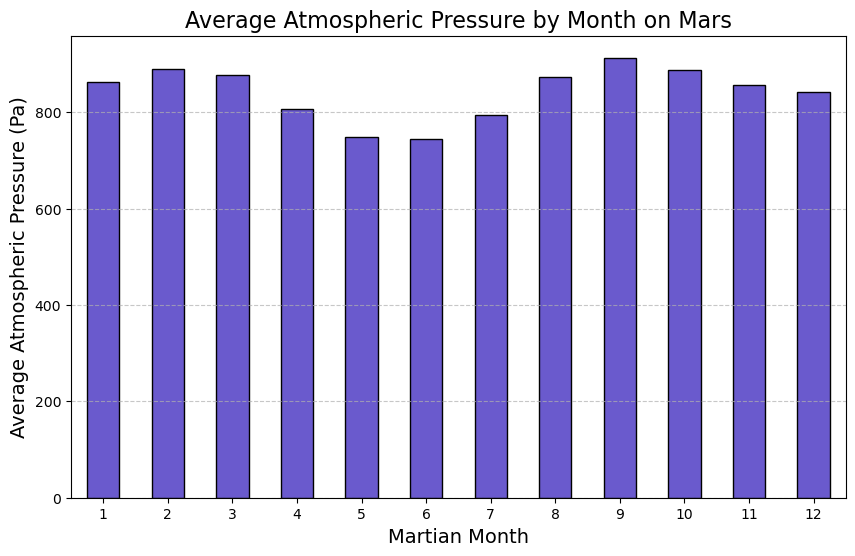

The month with the lowest atmospheric pressure on Mars is Month 6.
The month with the highest atmospheric pressure on Mars is Month 9.


In [31]:
# 4. What is the average pressure by month?
# Plot the average pressure by month
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_pressure_by_month.plot(kind='bar', color='slateblue', edgecolor='black')
plt.title("Average Atmospheric Pressure by Month on Mars", fontsize=16)
plt.xlabel("Martian Month", fontsize=14)
plt.ylabel("Average Atmospheric Pressure (Pa)", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Find the months with the lowest and highest atmospheric pressure
lowest_pressure_month = avg_pressure_by_month.idxmin()
highest_pressure_month = avg_pressure_by_month.idxmax()
print(f"The month with the lowest atmospheric pressure on Mars is Month {lowest_pressure_month}.")
print(f"The month with the highest atmospheric pressure on Mars is Month {highest_pressure_month}.")


In [32]:
# Group the data by 'month' and calculate the average pressure
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the results
print("Average Atmospheric Pressure by Month on Mars:")
print(avg_pressure_by_month)

Average Atmospheric Pressure by Month on Mars:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


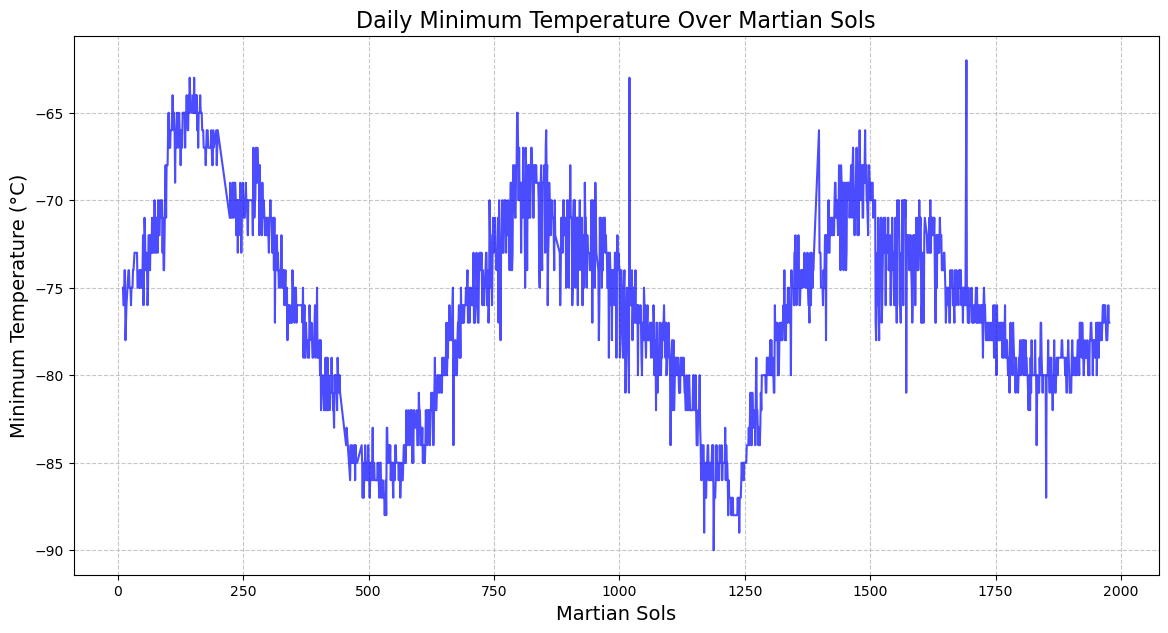

Approximately 687.1 terrestrial (Earth) days exist in a Martian year.


In [29]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Plot the daily minimum temperature over sols

plt.figure(figsize=(14, 7))
plt.plot(df['sol'], df['min_temp'], color='blue', alpha=0.7)
plt.title("Daily Minimum Temperature Over Martian Sols", fontsize=16)
plt.xlabel("Martian Sols", fontsize=14)
plt.ylabel("Minimum Temperature (°C)", fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Estimate the periodicity in sols (from visual observation)
# Martian year in sols (approx.)
martian_year_sols = 669  # Replace with observed periodicity if visual estimation differs

# Convert Martian sols to Earth days
earth_days_in_martian_year = martian_year_sols * 1.027  # 1 sol ≈ 1.027 Earth days

print(f"Approximately {earth_days_in_martian_year:.1f} terrestrial (Earth) days exist in a Martian year.")


#### Minimum Temperature

The coldest month on Mars is Month 3. (-83.307292)

The warmest month on Mars is Month 8. (-68.382979)

#### Atmospheric Pressure
The month with the lowest atmospheric pressure on Mars is Month 6. (745.054422)

The month with the highest atmospheric pressure on Mars is Month 9. (913.305970)

#### Year Length

Approximately 687.1 terrestrial (Earth) days exist in a Martian year.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)


In [34]:
browser.quit()